## 1. Tweet classification: Trump vs. Trudeau

> Indented block


<p>So you think you can classify text? How about tweets? In this notebook, we'll take a dive into the world of social media text classification by investigating how to properly classify tweets from two prominent North American politicians: Donald Trump and Justin Trudeau.</p>
<p><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/President_Donald_Trump_and_Prime_Minister_Justin_Trudeau_Joint_Press_Conference%2C_February_13%2C_2017.jpg/800px-President_Donald_Trump_and_Prime_Minister_Justin_Trudeau_Joint_Press_Conference%2C_February_13%2C_2017.jpg" alt="Donald Trump and Justin Trudeau shaking hands." height="50%" width="50%"></p>
<p><a href="https://commons.wikimedia.org/wiki/File:President_Donald_Trump_and_Prime_Minister_Justin_Trudeau_Joint_Press_Conference,_February_13,_2017.jpg">Photo Credit: Executive Office of the President of the United States</a></p>
<p>Tweets pose specific problems to NLP, including the fact they are shorter texts. There are also plenty of platform-specific conventions to give you hassles: mentions, #hashtags, emoji, links and short-hand phrases (ikr?). Can we overcome those challenges and build a useful classifier for these two tweeters? Yes! Let's get started.</p>
<p>To begin, we will import all the tools we need from scikit-learn. We will need to properly vectorize our data (<code>CountVectorizer</code> and <code>TfidfVectorizer</code>). And we will also want to import some models, including <code>MultinomialNB</code> from the <code>naive_bayes</code> module, <code>LinearSVC</code> from the <code>svm</code> module and <code>PassiveAggressiveClassifier</code> from the <code>linear_model</code> module. Finally, we'll need <code>sklearn.metrics</code> and <code>train_test_split</code> and <code>GridSearchCV</code> from the <code>model_selection</code> module to evaluate and optimize our model.</p>

In [ ]:
# Set seed for reproducibility
import random; random.seed(53)

# Import all we need from sklearn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics 


In [ ]:
%%nose
# This needs to be included at the beginning of every @tests cell.

# One or more tests of the students code.
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_CountVectorizer():
    assert 'CountVectorizer' in globals(), \
    'CountVectorizer should be imported.'
    
def test_TfidfVectorizer():
    assert 'TfidfVectorizer' in globals(), \
    'TfidfVectorizer should be imported.'
    
def test_train_test_split():
    assert 'train_test_split' in globals(), \
    'train_test_split should be imported.'
    
def test_MultinomialNB():
    assert 'MultinomialNB' in globals(), \
    'MultinomialNB should be imported.'

def test_LinearSVC():
    assert 'LinearSVC' in globals(), \
    'LinearSVC should be imported.'

def test_metrics():
    assert 'metrics' in globals(), \
    'metrics should be imported.'

6/6 tests passed


## 2. Transforming our collected data
<p>To begin, let's start with a corpus of tweets which were collected in November 2017. They are available in CSV format. We'll use a Pandas DataFrame to help import the data and pass it to scikit-learn for further processing.</p>
<p>Since the data has been collected via the Twitter API and not split into test and training sets, we'll need to do this. Let's use <code>train_test_split()</code> with <code>random_state=53</code> and a test size of 0.33, just as we did in the DataCamp course. This will ensure we have enough test data and we'll get the same results no matter where or when we run this code.</p>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
tweet_df=pd.read_csv("datasets/tweets.csv")

# Create target
y = tweet_df['author']

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split( tweet_df['status'], y, test_size=0.33, random_state=53)

In [ ]:
%%nose
# This needs to be included at the beginning of every @tests cell.

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_df():
    assert isinstance(tweet_df, pd.DataFrame), \
    'tweet_df should be a Pandas DataFrame.'

def test_y():
    assert isinstance(y, pd.Series), \
    'y should be a Pandas Series.'

def train_test_split_test():
    assert len(y_train) == len(X_train), \
    'Make sure to run the train-test split.'
    assert len(y_test) == len(X_test), \
    'Make sure to run the train-test split.'

3/3 tests passed


## 3. Vectorize the tweets
<p>We have the training and testing data all set up, but we need to create vectorized representations of the tweets in order to apply machine learning.</p>
<p>To do so, we will utilize the <code>CountVectorizer</code> and <code>TfidfVectorizer</code> classes which we will first need to fit to the data.</p>
<p>Once this is complete, we can start modeling with the new vectorized tweets!</p>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing CountVectorizer with English stop words removed, min_df=0.05, and max_df=0.9
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Fitting and transforming the training data to create count_train
count_train = count_vectorizer.fit_transform(X_train)

# Transforming the test data to create count_test
count_test = count_vectorizer.transform(X_test)

# Initializing TfidfVectorizer with English stop words removed, min_df=0.05, and max_df=0.9
tfidf_vectorizer=TfidfVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Fitting and transforming the training data to create tfdif_train
tfidf_train=tfidf_vectorizer.fit_transform(X_train)

# Transforming the test data to create tfdif_test
tfidf_test=tfidf_vectorizer.transform(X_test)

In [ ]:
%%nose
# This needs to be included at the beginning of every @tests cell.

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.
import scipy

def test_train():
    assert isinstance(count_train, scipy.sparse.csr.csr_matrix), \
    'Make sure to run the count vectorizer for the training data.'
    assert isinstance(tfidf_train, scipy.sparse.csr.csr_matrix), \
    'Make sure to run the TFIDF vectorizer for the training data.'

def test_test():
    assert isinstance(count_test, scipy.sparse.csr.csr_matrix), \
    'Make sure to run the count vectorizer for the test data.'
    assert isinstance(tfidf_test, scipy.sparse.csr.csr_matrix), \
    'Make sure to run the TFIDF vectorizer for the test data.'
    
def test_vectorizers():
    assert isinstance(tfidf_vectorizer, TfidfVectorizer), \
    'tfidf_vectorizer is missing or an incorrect type.'
    assert isinstance(count_vectorizer, CountVectorizer), \
    'count_vectorizer is missing or an incorrect type.'
    assert tfidf_vectorizer.stop_words == 'english', \
    'Use parameters to set the stop words for the TFIDF vectorizer.'
    assert count_vectorizer.stop_words == 'english', \
    'Use parameters to set the stop words for the count vectorizer.'
    assert tfidf_vectorizer.max_df == 0.9, \
    'Use parameters to set the max_df for the TFIDF vectorizer.'
    assert count_vectorizer.max_df == 0.9, \
    'Use parameters to set the max_df for the count vectorizer.'
    assert tfidf_vectorizer.min_df == 0.05, \
    'Use parameters to set the min_df for the TFIDF vectorizer.'
    assert count_vectorizer.min_df == 0.05, \
    'Use parameters to set the min_df for the count vectorizer.'


3/3 tests passed


## 4. Training a multinomial naive Bayes model
<p>Now that we have the data in vectorized form, we can train the first model. Investigate using the Multinomial Naive Bayes model with both the <code>CountVectorizer</code> and <code>TfidfVectorizer</code> data. Which do will perform better? How come?</p>
<p>To assess the accuracies, we will print the test sets accuracy scores for both models.</p>

In [ ]:
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB()

# ... Train your model here ...
tfidf_nb.fit(tfidf_train, y_train)

# Run predict on your TF-IDF test data to get your predictions
tfidf_nb_pred =tfidf_nb.predict(tfidf_test)

# Calculate the accuracy of your predictions
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

# Create a MulitnomialNB model
count_nb = MultinomialNB()

# ... Train your model here ...
count_nb.fit(count_train,y_train)

# Run predict on your count test data to get your predictions
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy of your predictions
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.803030303030303
NaiveBayes Count Score:  0.7954545454545454


In [ ]:
%%nose
# This needs to be included at the beginning of every @tests cell.

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

import numpy

def test_models():
    assert isinstance(count_nb, MultinomialNB), \
    'count_nb should be a MultinomialNB model.'
    assert isinstance(tfidf_nb, MultinomialNB), \
    'tfidf_nb should be a MultinomialNB model.'
    assert isinstance(count_nb.classes_, numpy.ndarray)
    assert len(count_nb.classes_) == 2, \
    'count_nb should have only two classes.'
    assert isinstance(tfidf_nb.classes_, numpy.ndarray)
    assert len(tfidf_nb.classes_) == 2, \
    'tfidf_nb should have only two classes.' 
    

def test_pred():
    assert isinstance(tfidf_nb_pred, numpy.ndarray), \
    'tfidf_nb_pred should be a numpy array.'
    assert isinstance(count_nb_pred, numpy.ndarray), \
    'count_nb_pred should be a numpy array.'
    assert set(tfidf_nb_pred) == set(tfidf_nb.classes_), \
    'tfidf_nb_pred should use the same classes as the model for prediction.'
    assert set(count_nb_pred) == set(count_nb.classes_), \
    'count_nb_pred should use the same classes as the model for prediction.'

def test_score():
    assert isinstance(tfidf_nb_score, float), \
    'tfidf_nb_score should be a float.'
    assert isinstance(count_nb_score, float), \
    'count_nb_score should be a float.'
    assert tfidf_nb_score > .802, \
    'tfidf_nb_score should be above .802'
    assert count_nb_score > .794, \
    'count_nb_score should be above .794'

3/3 tests passed


## 5. Evaluating our model using a confusion matrix
<p>We see that the TF-IDF model performs better than the count-based approach. Based on what we know from the NLP fundamentals course, why might that be? We know that TF-IDF allows unique tokens to have a greater weight - perhaps tweeters are using specific important words that identify them! Let's continue the investigation.</p>
<p>For classification tasks, an accuracy score doesn't tell the whole picture. A better evaluation can be made if we look at the confusion matrix, which shows the number correct and incorrect classifications based on each class. We can use the metrics, True Positives, False Positives, False Negatives, and True Negatives, to determine how well the model performed on a given class. How many times was Trump misclassified as Trudeau?</p>

Confusion matrix, without normalization
Confusion matrix, without normalization


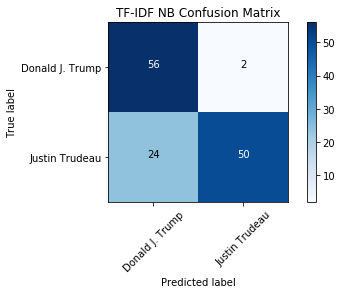

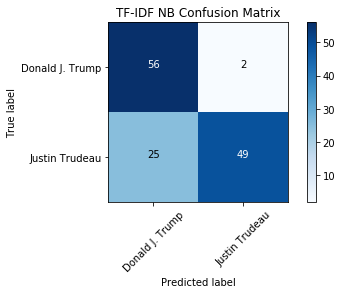

In [ ]:
%matplotlib inline

from datasets.helper_functions import plot_confusion_matrix

# Calculate the confusion matrices for the tfidf_nb model and count_nb models
tfidf_nb_cm = metrics.confusion_matrix(y_test,tfidf_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
count_nb_cm = metrics.confusion_matrix(y_test,count_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])

# Plot the tfidf_nb_cm confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix")

# Plot the count_nb_cm confusion matrix without overwriting the first plot 
plot_confusion_matrix(count_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix", figure=1)


In [ ]:
%%nose
# This needs to be included at the beginning of every @tests cell

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.
import numpy


def test_cm():
    assert isinstance(tfidf_nb_cm, numpy.ndarray), \
    'tfidf_nb_cm should be a NumPy array.'
    assert isinstance(count_nb_cm, numpy.ndarray), \
    'count_nb_cm should be a NumPy array.'
    assert tfidf_nb_cm[0][0] == 56, \
    'The true label and predicted label for Trump in the TFIDF MultinomialNB model should be 56.'

1/1 tests passed


## 6. Trying out another classifier: Linear SVC
<p>So the Bayesian model only has one prediction difference between the TF-IDF and count vectorizers -- fairly impressive! Interestingly, there is some confusion when the predicted label is Trump but the actual tweeter is Trudeau. If we were going to use this model, we would want to investigate what tokens are causing the confusion in order to improve the model. </p>
<p>Now that we've seen what the Bayesian model can do, how about trying a different approach? <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html">LinearSVC</a> is another popular choice for text classification. Let's see if using it with the TF-IDF vectors improves the accuracy of the classifier!</p>

LinearSVC Score:   0.841
Confusion matrix, without normalization


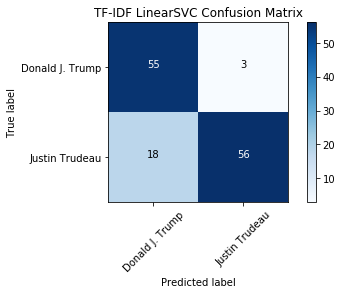

In [ ]:
# Create a LinearSVM model
tfidf_svc = LinearSVC()

# ... Train your model here ...
tfidf_svc.fit(tfidf_train, y_train)

# Run predict on your tfidf test data to get your predictions
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculate your accuracy using the metrics module
tfidf_svc_score = metrics.accuracy_score(y_test,tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Calculate the confusion matrices for the tfidf_svc model
svc_cm = metrics.confusion_matrix(y_test,tfidf_svc_pred, labels=['Donald J. Trump', 'Justin Trudeau'])

# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(svc_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF LinearSVC Confusion Matrix")

In [ ]:
%%nose
# This needs to be included at the beginning of every @tests cell.

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.
import numpy

def test_models():
    assert isinstance(tfidf_svc, LinearSVC), \
    'tfidf_svc should be a LinearSVC model.'
    assert isinstance(tfidf_svc.classes_, numpy.ndarray), \
    'tfidf_svc should have the proper classes.'
    assert len(tfidf_svc.classes_) == 2, \
    'tfidf_svc should have exactly 2 classes.' 

def test_pred():
    assert isinstance(tfidf_svc_pred, numpy.ndarray), \
    'tfidf_svc_pred should be a numpy array.'
    assert set(tfidf_svc_pred) == set(tfidf_svc.classes_), \
    'tfidf_svc_pred should have the same classes as the model.'
    
def test_score():
    assert isinstance(tfidf_svc_score, float), \
    'tfidf_svc_score should be a float.'
    assert tfidf_svc_score > .84, \
    'tfidf_svc_score should be > .84.' 

3/3 tests passed


## 7. Introspecting our top model
<p>Wow, the LinearSVC model is even better than the Multinomial Bayesian one. Nice work! Via the confusion matrix we can see that, although there is still some confusion where Trudeau's tweets are classified as Trump's, the False Positive rate is better than the previous model. So, we have a performant model, right? </p>
<p>We might be able to continue tweaking and improving all of the previous models by learning more about parameter optimization or applying some better preprocessing of the tweets. </p>
<p>Now let's see what the model has learned. Using the LinearSVC Classifier with two classes (Trump and Trudeau) we can sort the features (tokens), by their weight and see the most important tokens for both Trump and Trudeau. What are the most Trump-like or Trudeau-like words? Did the model learn something useful to distinguish between these two men? </p>

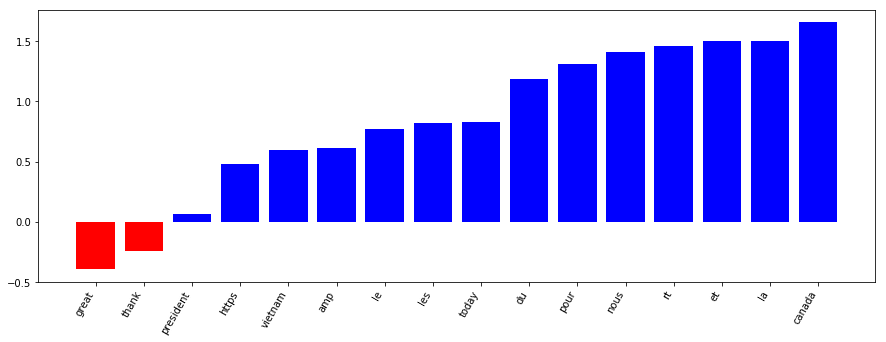

[(-0.3959805096637012, 'great'),
 (-0.24645305517926153, 'thank'),
 (0.06257945672976514, 'president'),
 (0.4821314079500245, 'https'),
 (0.5960471797135609, 'vietnam'),
 (0.6155579923199074, 'amp'),
 (0.7725805664176709, 'le'),
 (0.8213760364933008, 'les'),
 (0.8286564890048842, 'today'),
 (1.1869078715724872, 'du'),
 (1.3143523413860758, 'pour'),
 (1.4122577007419972, 'nous'),
 (1.4612745610583942, 'rt'),
 (1.4991760717609708, 'et'),
 (1.5056442036271984, 'la'),
 (1.656797551241633, 'canada')]


In [ ]:
from datasets.helper_functions import plot_and_return_top_features

# Import pprint from pprint
from pprint import pprint

# Get the top features using the plot_and_return_top_features function and your top model and tfidf vectorizer
top_features = plot_and_return_top_features(tfidf_svc,tfidf_vectorizer)

# pprint the top features
pprint(top_features)

In [ ]:
%%nose
# This needs to be included at the beginning of every @tests cell.

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert isinstance(top_features, list), \
    'top_features should be a Python list.'
    assert isinstance(top_features[0], tuple), \
    'The top_features should be a list of tuples.'
    assert isinstance(top_features[0][0], float), \
    'The first element of each tuple in the top_features list should be a float.'
    assert isinstance(top_features[0][1], str), \
    'The second element of each tuple in the top_features list should be a string.'
    assert top_features[0][1] == 'great', \
    'The top feature for Trump (i.e. first feature returned) should be the word: great.'

1/1 tests passed


## 8. Bonus: can you write a Trump or Trudeau tweet?
<p>So, what did our model learn? It seems like it learned that Trudeau tweets in French!</p>
<p>I challenge you to write your own tweet using the knowledge gained to trick the model! Use the printed list or plot above to make some inferences about what words will classify your text as Trump or Trudeau. Can you fool the model into thinking you are Trump or Trudeau?</p>
<p>If you can write French, feel free to make your Trudeau-impersonation tweet in French! As you may have noticed, these French words are common words, or, "stop words". You could remove both English and French stop words from the tweets as a preprocessing step, but that might decrease the accuracy of the model because Trudeau is the only French-speaker in the group. If you had a dataset with more than one French speaker, this would be a useful preprocessing step.</p>
<p>Future work on this dataset could involve:</p>
<ul>
<li>Add extra preprocessing (such as removing URLs or French stop words) and see the effects</li>
<li>Use GridSearchCV to improve both your Bayesian and LinearSVC models by finding the optimal parameters</li>
<li>Introspect your Bayesian model to determine what words are more Trump- or Trudeau- like</li>
<li>Add more recent tweets to your dataset using tweepy and retrain</li>
</ul>
<p>Good luck writing your impersonation tweets -- feel free to share them on Twitter!</p>

In [ ]:
trump_tweet = "Thank God America is great!"
trudeau_tweet = "Et tu Coffeffe" 

trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

trump_tweet_pred = tfidf_svc.predict(trump_tweet_vectorized)
trudeau_tweet_pred = tfidf_svc.predict(trudeau_tweet_vectorized)

print("Predicted Trump tweet", trump_tweet_pred)
print("Predicted Trudeau tweet", trudeau_tweet_pred)

Predicted Trump tweet ['Donald J. Trump']
Predicted Trudeau tweet ['Justin Trudeau']


In [ ]:
%%nose
# This needs to be included at the beginning of every @tests cell.

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.
import scipy

def test_example():
    assert isinstance(trump_tweet, str), \
    "trump_tweet should be a Python string"
    assert isinstance(trudeau_tweet, str), \
    "trudeau_tweet should be a Python string"
    assert isinstance(trump_tweet_vectorized, scipy.sparse.csr.csr_matrix), \
    'Make sure to transform the Trump tweet using the TF-IDF vectorizer.'
    assert isinstance(trudeau_tweet_vectorized, scipy.sparse.csr.csr_matrix), \
    'Make sure to transform the Trudeau tweet using hte TF-IDF vectorizer.'
    assert trump_tweet_pred == ['Donald J. Trump'], \
    'Your tweet was not classified as a Trump tweet, try again!'
    assert trudeau_tweet_pred == ['Justin Trudeau'], \
    'Your tweet was not classified as a Trudeau tweet, try again!'    

1/1 tests passed
